## Keeno Glanville

# Simulation of NYC DMV



## Introduction

In the United States, the Department of Motor Vehicles(DMV) is a government agency that administers motor vehicle registration and driver licensing. These departments are governed by state and have varying processes and applications. Within many states however, there are huge complaints that these departments tend to be overcrowded and have terrible processes. As a resuult, there are awful queue times that people have to wait in order to have even the most simple things done wihin the dmv. This is even more complicated by the fact that individuals have a plethora of options within the DMV like taking tests, getting licenses, registering for tests, paying tickets, etc. And all these processses can be disturbed by the factors of being prepared vs time of arrival. 



# Problem

The Department of Motor Vehicles (DMV) faces significant challenges in managing customer flow, minimizing wait times, and improving overall customer satisfaction. Customers often experience long queue times and inefficient processes, resulting in frustration and delays in obtaining essential services such as driver's license applications, vehicle registrations, and license plate issuances. The problem lies in the complex nature of the DMV, where various processes and services need to be streamlined and optimized to enhance operational efficiency and provide a better experience for customers.


# Significance

Efficient and streamlined operations at the DMV are crucial for several reasons. First, reducing wait times and improving service delivery enhances customer satisfaction and reduces frustration. It helps individuals complete their necessary transactions promptly and with minimal disruption to their daily lives. Second, optimizing DMV operations leads to cost savings for the government and taxpayers by maximizing the utilization of resources, such as staff, counters, and equipment. Third, a well-functioning DMV contributes to safer roads and improved compliance with traffic regulations by ensuring that drivers have the necessary licenses and registrations. By simulating the DMV processes and evaluating key performance metrics such as wait times and resource utilization, we can identify areas for improvement and implement strategies to enhance the efficiency of DMV operations, ultimately benefiting both customers and the government.

# Flow Chart


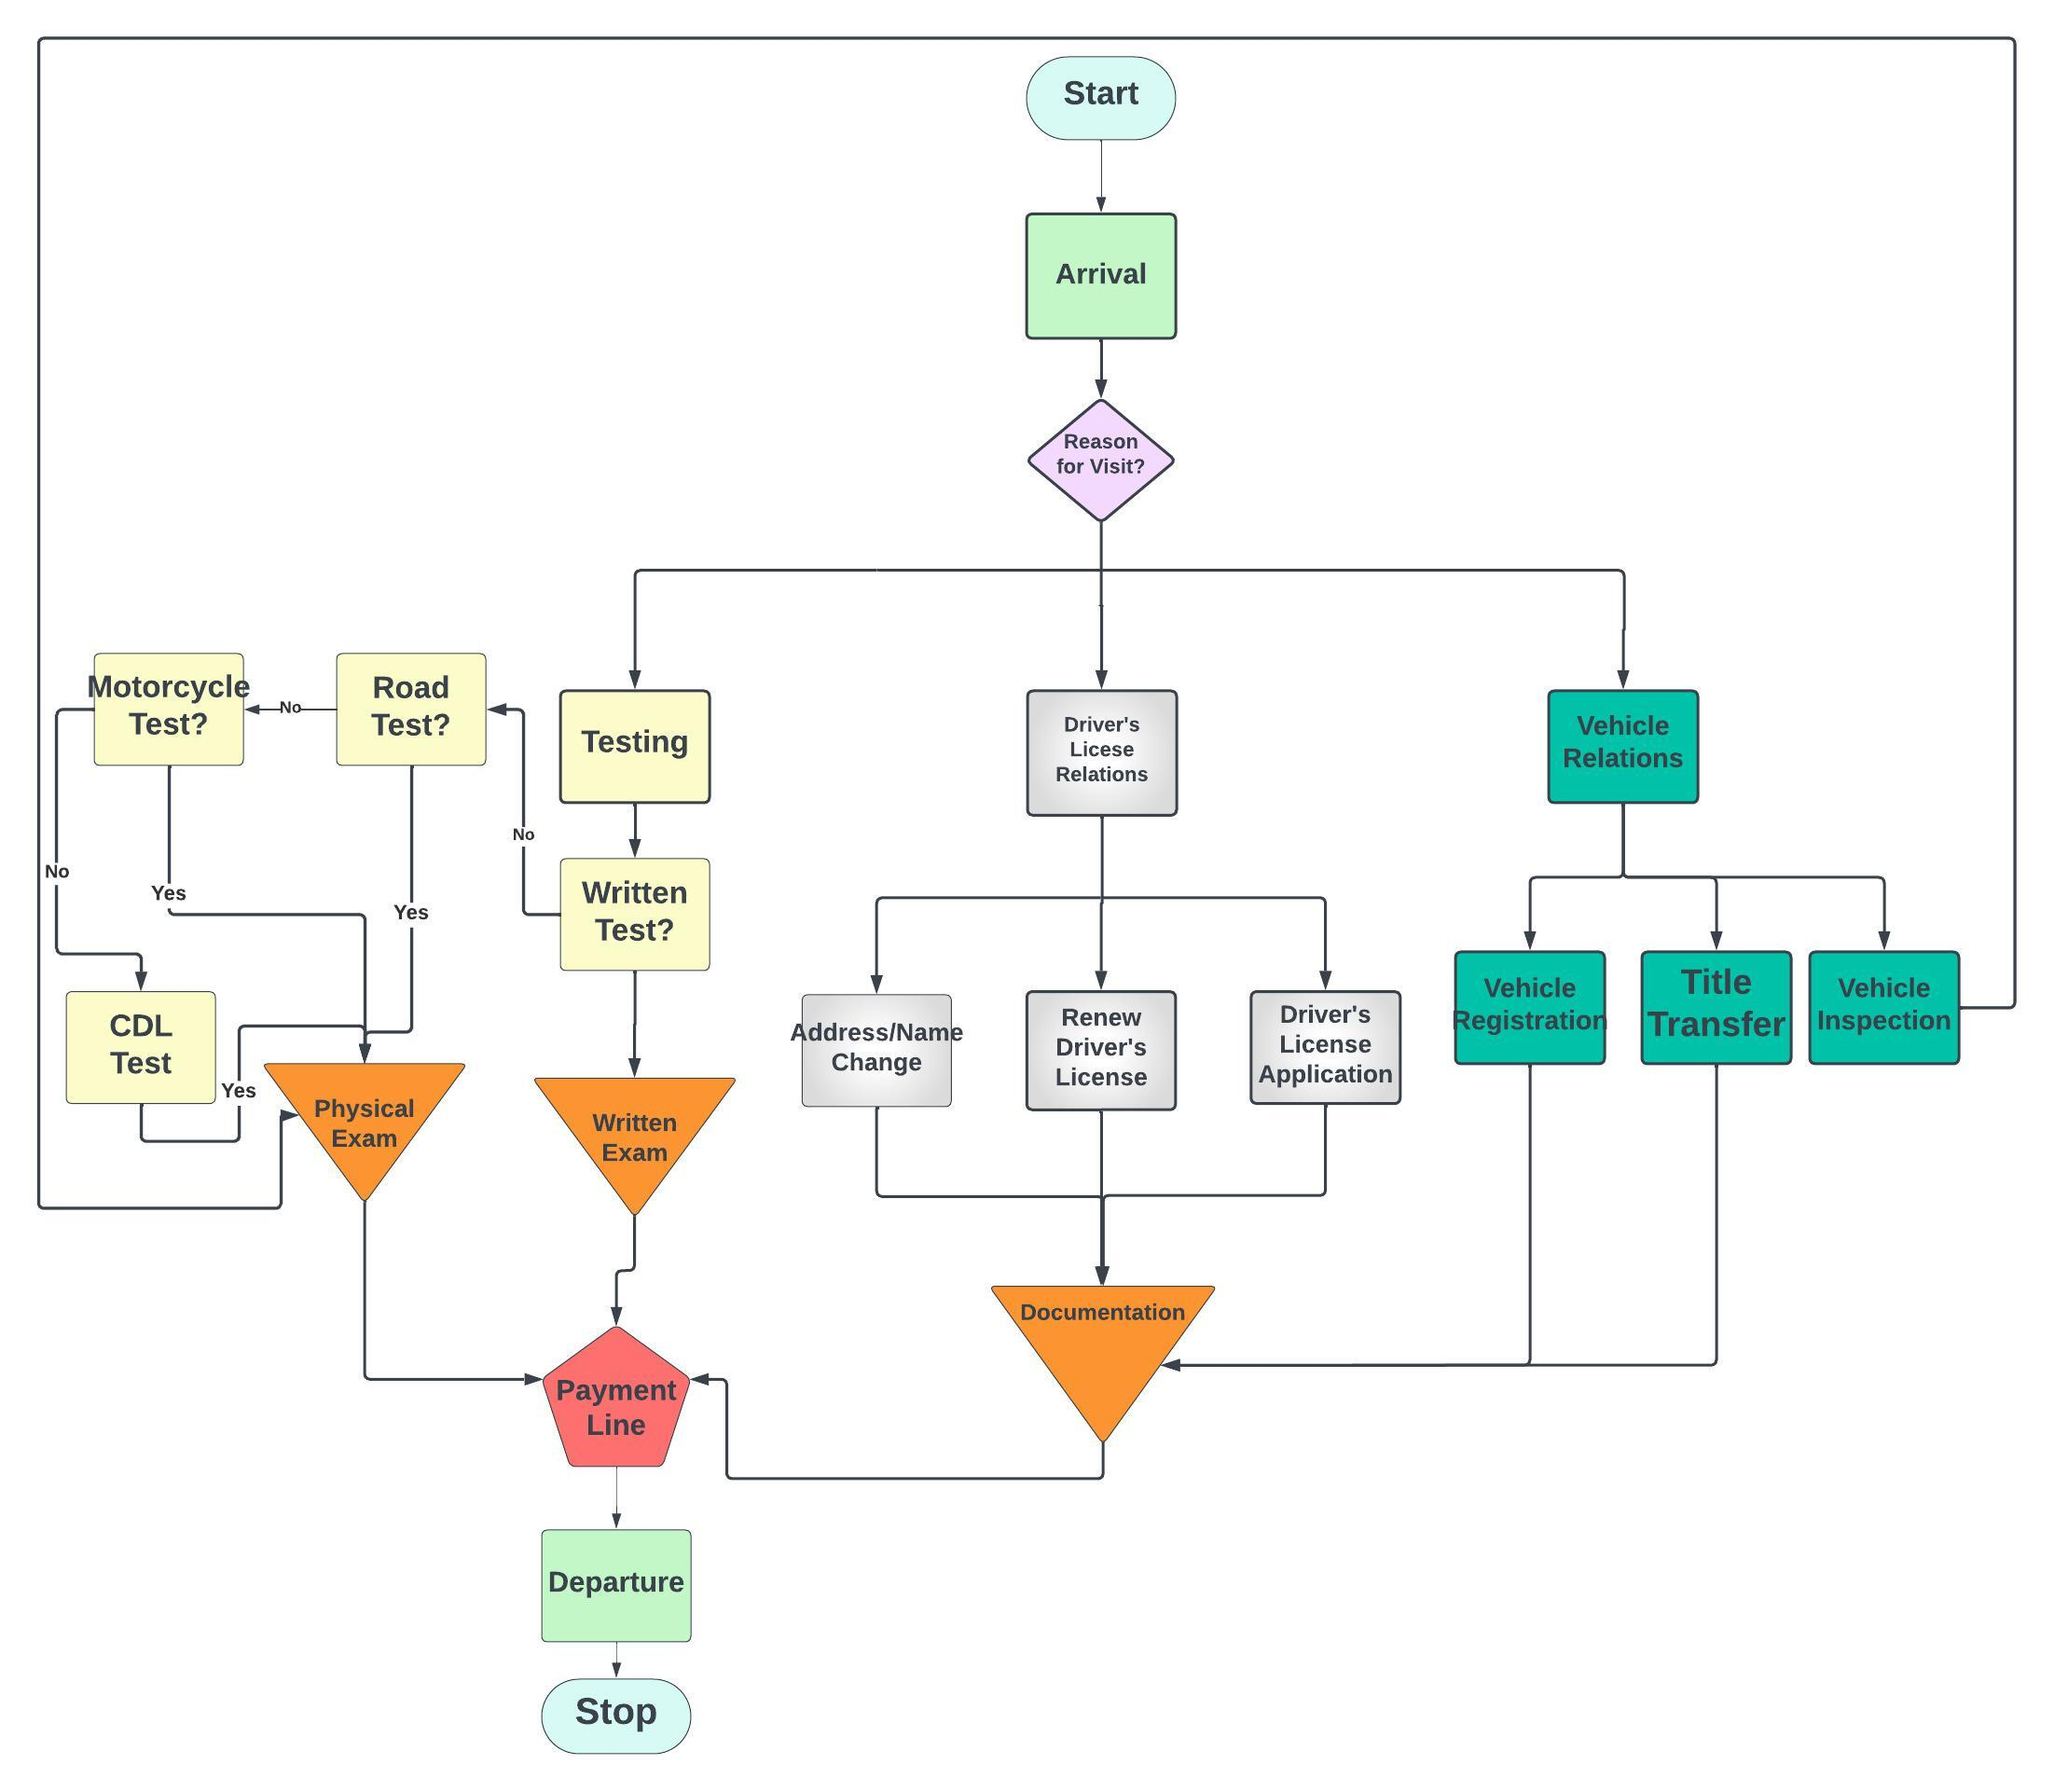

In [12]:
from IPython.display import Image, display

# Specify the desired width and height
width = 1000
height = 250
image_path = "DMV.jpeg"

# Display the image
display(Image(filename=image_path, width=width, height=height))

In [1]:
# Import required libraries
!pip install simpy
import simpy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
random.seed(1)


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import simpy
import random

# Constants
MEAN_INTERARRIVAL = 0.03
NUM_PHYSICAL_EXAMINERS = 10
NUM_DOCUMENTATION_STATIONS = 20
NUM_WRITTEN_EXAM_SEATS = 20
NUM_PAYMENT_STATIONS = 5

MIN_PHYSICAL_EXAM_TIME = 1800
MAX_PHYSICAL_EXAM_TIME = 3600
MIN_WRITTEN_TEST_TIME = 1800
MAX_WRITTEN_TEST_TIME = 2700
MIN_DOCUMENTATION_TIME = 2400
MAX_DOCUMENTATION_TIME = 5400
PAYMENT_TIME = 300

completed_people = set()  # Set to track completed people
person_data = []


# Simulation model
def dmv_simulation(env, ordernum, activity, payment_resource):
    # Select ticket and move on
    print(f"Person {ordernum} Arrived at {env.now}")
    arrival_time = env.now

    if activity == "written exam":
        with written_exam_resource.request() as written_req:
            yield written_req
            test_time = env.now
            print(f"Person {ordernum} started written exam at {env.now}")
            Wexam = random.uniform(MIN_WRITTEN_TEST_TIME, MAX_WRITTEN_TEST_TIME)
            yield env.timeout(Wexam)
            print(f"Person {ordernum} completed written exam at {env.now}")

    elif activity == "physical exam":
        with physical_exam_resource.request() as exam_req:
            yield exam_req
            test_time = env.now
            print(f"Person {ordernum} started physical exam at {env.now}")
            Pexam = random.uniform(MIN_PHYSICAL_EXAM_TIME, MAX_PHYSICAL_EXAM_TIME)
            yield env.timeout(Pexam)
            print(f"Person {ordernum} completed physical exam at {env.now}")

    elif activity == "documentation":  
        with documentation_resource.request() as doc_req:
            yield doc_req
            test_time = env.now
            print(f"Person {ordernum} started documentation at {env.now}")
            docz = random.uniform(MIN_DOCUMENTATION_TIME, MAX_DOCUMENTATION_TIME)
            yield env.timeout(docz)
            print(f"Person {ordernum} completed documentation at {env.now}")

    # Create a dictionary to store person's data
    person = {
        'Order Number': ordernum,
        'Arrival Time': arrival_time,
        'Activity': activity,
        'Activity Start Time': test_time,  # Use test_time as the activity start time
        'Wait Time on Activity': test_time - arrival_time,  # Calculate wait time in activity
        'Payment Queue Start Time': None,
        'Wait Time in Payment Queue': None,
        'Departure Time': None,
        'Total Time in DMV': None
    }

    # Move to payment
    with payment_resource.request() as payment_req:
        person['Payment Queue Start Time'] = env.now
        print(f"Person {ordernum} joined Payment Queue at {env.now}")
        yield payment_req
        yield env.timeout(PAYMENT_TIME)
        print(f"Person {ordernum} Exited DMV at {env.now}")
        person['Wait Time in Payment Queue'] = env.now - person['Payment Queue Start Time']
        person['Departure Time'] = env.now
        person['Total Time in DMV'] = person['Departure Time'] - person['Arrival Time']
        completed_people.add(ordernum)  # Add the person to the completed set
        person_data.append(person)  # Add person's data to the list


# Arrival
def arrive(env, activities, num_people):
    ordernum = 0
    total_people_processed = 0
    while total_people_processed < sum(num_people.values()):
        for activity, count in num_people.items():
            for _ in range(count):
                ordernum += 1
                if ordernum not in completed_people:
                    env.process(dmv_simulation(env, ordernum, activity, payment_resource))
                    total_people_processed += 1
                    if total_people_processed >= sum(num_people.values()):
                        break
                yield env.timeout(random.uniform(1, 2))  # Introduce delay between arrivals


# Create the simulation environment
env = simpy.Environment()

# Resources
physical_exam_resource = simpy.Resource(env, capacity=NUM_PHYSICAL_EXAMINERS)
written_exam_resource = simpy.Resource(env, capacity=NUM_WRITTEN_EXAM_SEATS)
documentation_resource = simpy.Resource(env, capacity=NUM_DOCUMENTATION_STATIONS)
payment_resource = simpy.Resource(env, capacity=NUM_PAYMENT_STATIONS)

# Set the number of people for each activity
num_written_test = 10
num_road_test = 30
num_motorcycle_test = 20
num_cdl_test = 1
num_vehicle_inspection = 20
num_address_change = 4
num_renew_license = 20
num_license_application = 100
num_vehicle_registration = 1
num_title_transfer = 1

# Set the activities and the number of people for each activity
activities = ["written exam", "physical exam", "documentation"]
num_people = {
    "written exam": num_written_test,
    "physical exam": num_road_test + num_motorcycle_test + num_cdl_test + num_vehicle_inspection,
    "documentation": num_address_change + num_renew_license + num_license_application +
                      num_vehicle_registration + num_title_transfer + num_vehicle_inspection
}

# Start the arrival process
arrival_process = env.process(arrive(env, activities, num_people))

# Run the simulation until the last person has exited
while len(completed_people) < sum(num_people.values()):
    try:
        env.run(until=env.now + 1)  # Run the simulation for a small time increment
    except simpy.StopSimulation:
        # Simulation stopped prematurely
        break

# Simulation completed or stopped


Person 1 Arrived at 0
Person 1 started written exam at 0
Person 2 Arrived at 1.1528893223936487
Person 2 started written exam at 1.1528893223936487
Person 3 Arrived at 2.7799068008447527
Person 3 started written exam at 2.7799068008447527
Person 4 Arrived at 3.894667059171516
Person 4 started written exam at 3.894667059171516
Person 5 Arrived at 5.2927695543855195
Person 5 started written exam at 5.2927695543855195
Person 6 Arrived at 6.561558408738399
Person 6 started written exam at 6.561558408738399
Person 7 Arrived at 8.442083716471359
Person 7 started written exam at 8.442083716471359
Person 8 Arrived at 10.43535566676049
Person 8 started written exam at 10.43535566676049
Person 9 Arrived at 12.043133866564945
Person 9 started written exam at 12.043133866564945
Person 10 Arrived at 13.443626967865356
Person 10 started written exam at 13.443626967865356
Person 11 Arrived at 14.756109466506581
Person 11 started physical exam at 14.756109466506581
Person 12 Arrived at 15.793583333549

# Verification and Validation

In terms of Verification, this segment of the process was immensely daunting. In order to verify the model was working effectively, I utilized print statements during the creation of the code. The most difficult part of this operation was the fact that I wanted to incorporate the great variation in the DMV's process. This often resulted in the code running each iteration independently and running the full process as if only one person could enter the DMV at a time. This was obviosuly not realistic and was eventually fixed.

In terms of Validation, the Annual reports of the DMV data dont issue the various queue times or average ammounts of people that enter the facilities. It was through searching through the average estimated times one can expect to be within the facilities for various activities that I was able to create the process and estimate how long someone can be expected to be in the facility. One important thing is that the model would have to be built to accommodate the 7 hour work day. And as an effect the DMV woulnt let too many people in as it would bring them to capacity and not allow them to leave and go home in time.

In [110]:
import pandas as pd
df = pd.DataFrame(person_data)

df_randomized = df.sample(frac=1)  # Randomize the rows
df_randomized.head(20)



,Order Number,Arrival Time,Activity,Activity Start Time,Wait Time on Activity,Payment Queue Start Time,Wait Time in Payment Queue,Departure Time,Total Time in DMV
92,128,192.149066,documentation,7329.924137,7137.775071,10606.090671,300.000000,10906.090671,10713.941604
171,76,113.965866,physical exam,16568.056354,16454.090488,19916.747357,300.000000,20216.747357,20102.781491
192,191,285.770394,documentation,18875.964096,18590.193701,24061.750014,300.000000,24361.750014,24075.979619
188,184,276.299030,documentation,17431.313269,17155.014239,22097.934855,300.000000,22397.934855,22121.635824
71,121,180.379817,documentation,5388.686741,5208.306924,8522.091962,300.000000,8822.091962,8641.712144
86,43,61.825192,physical exam,7767.111109,7705.285917,10080.854446,300.000000,10380.854446,10319.029254
165,168,252.522267,documentation,14238.838366,13986.316099,19047.008801,300.000000,19347.008801,19094.486534
210,221,330.876096,documentation,24736.957414,24406.081318,27267.443345,300.000000,27567.443345,27236.567249
113,143,215.609229,documentation,9495.928574,9280.319345,13061.354525,300.000000,13361.354525,13145.745296
164,72,107.641559,physical exam,15364.462901,15256.821341,18942.103092,300.000000,19242.103092,19134.461533


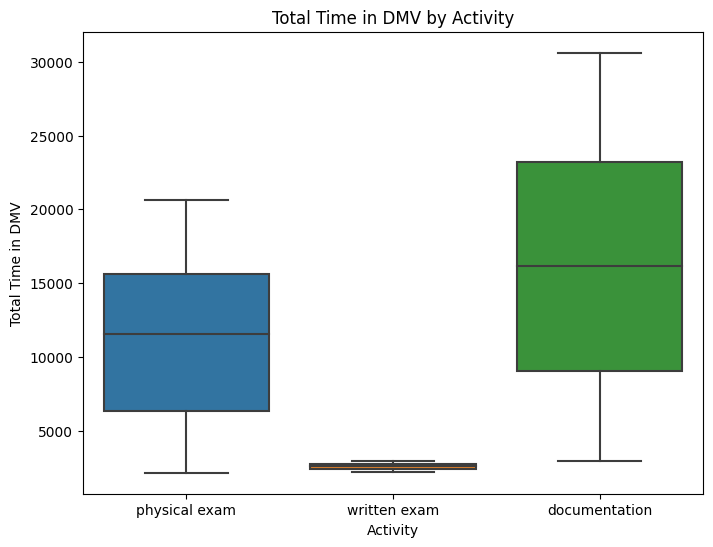

In [75]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Activity', y='Total Time in DMV')
plt.xlabel('Activity')
plt.ylabel('Total Time in DMV')
plt.title('Total Time in DMV by Activity')
plt.show()


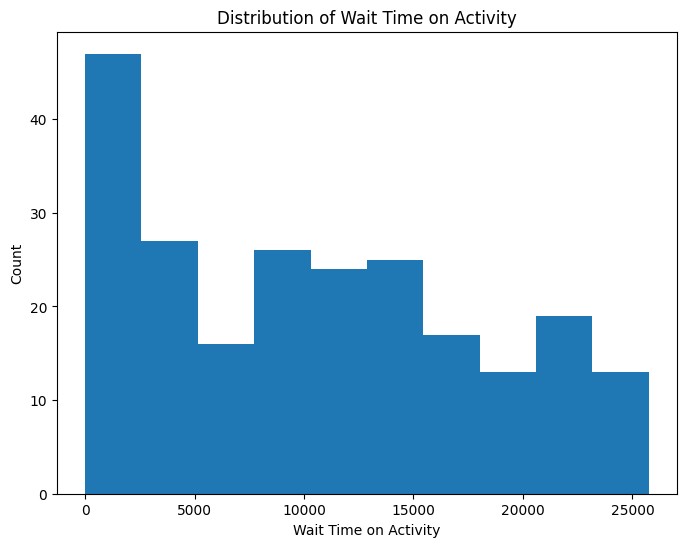

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(df['Wait Time on Activity'], bins=10)
plt.xlabel('Wait Time on Activity')
plt.ylabel('Count')
plt.title('Distribution of Wait Time on Activity')
plt.show()


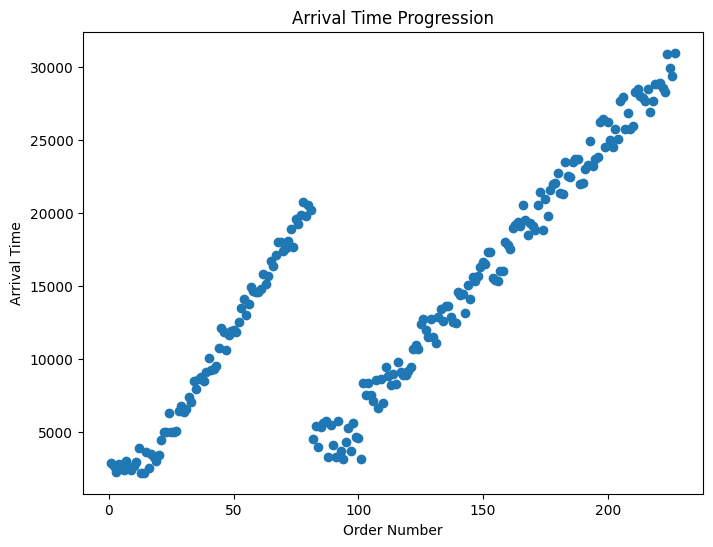

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Order Number'], df['Departure Time'])
plt.xlabel('Order Number')
plt.ylabel('Arrival Time')
plt.title('Arrival Time Progression')
plt.show()


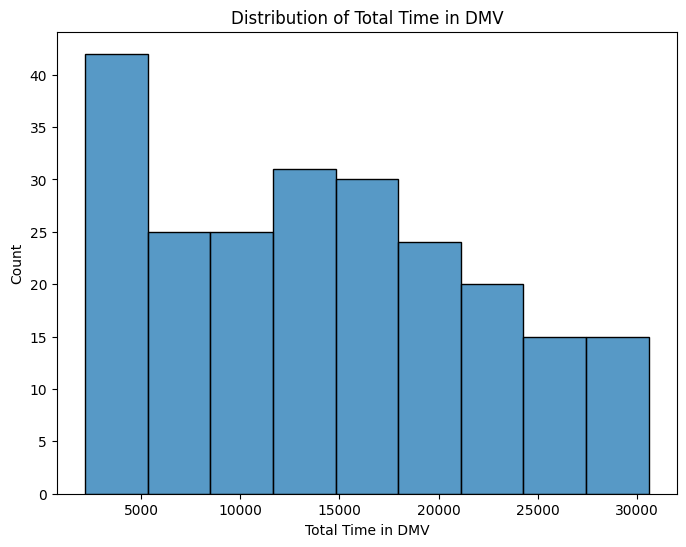

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total Time in DMV')
plt.xlabel('Total Time in DMV')
plt.ylabel('Count')
plt.title('Distribution of Total Time in DMV')
plt.show()


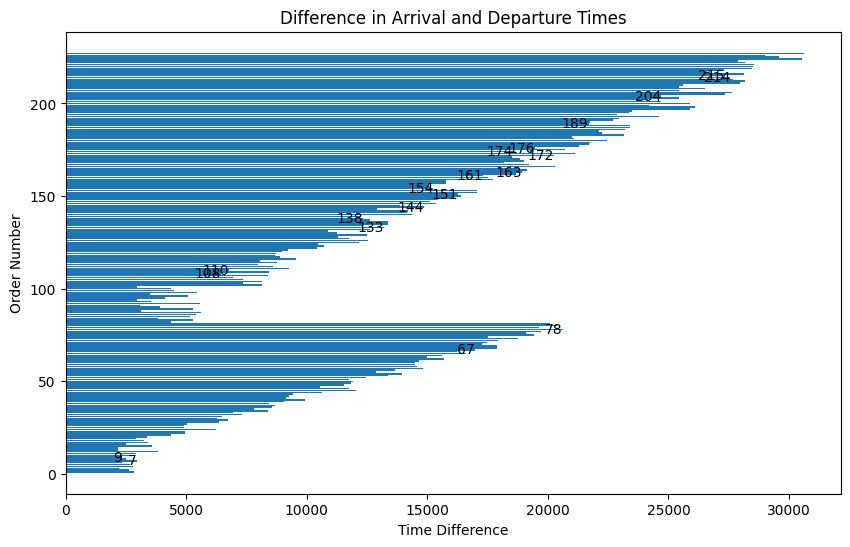

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of random labels to display
num_labels = 20

# Randomly choose order numbers
random_order_numbers = np.random.choice(df['Order Number'], size=num_labels, replace=False)

# Sort the DataFrame by arrival time
df_sorted = df.sort_values('Arrival Time')

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Order Number'], df_sorted['Departure Time'] - df_sorted['Arrival Time'])

# Add labels for randomly selected individuals
for order_number in random_order_numbers:
    time_difference = df_sorted.loc[df_sorted['Order Number'] == order_number, 'Departure Time'] - df_sorted.loc[df_sorted['Order Number'] == order_number, 'Arrival Time']
    plt.text(time_difference, order_number, str(order_number), ha='right', va='center')

plt.xlabel('Time Difference')
plt.ylabel('Order Number')
plt.title('Difference in Arrival and Departure Times')
plt.show()


In [97]:
persons = df[df['Order Number'].isin([67, 110])]
print(persons.to_string(index=False))


 Order Number  Arrival Time      Activity  Activity Start Time  Wait Time on Activity  Payment Queue Start Time  Wait Time in Payment Queue  Departure Time  Total Time in DMV
          110    168.602250 documentation          3981.458715            3812.856465               6657.509092                       300.0     6957.509092        6788.906842
           67    101.574229 physical exam         14278.355885           14176.781656              16768.184241                       300.0    17068.184241       16966.610012


# Conclusion

### The model was quite insightful. I went into the model thinking it would be highlighting the disfunction of the DMV but it really just highlights how varied their day can be and how ill-prepared they can be for that to happen. This day was a document heavy day and we see that the documentation team was actually faster than the physical exam team. This is all due to the allocated resources given. I expected since I made the model harder for documentation as those tended to be the longest wait times within the DMV, that they would always end up taking the longest time, but because the model I set up accounted for them having the manpower to deal with people, they were able to overcome that onslaught. Overasll this simulation gave me a whole new perspective on the processes of the DMV.